<a href="https://colab.research.google.com/github/adam-bozman/courses/blob/main/UsingYahooFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Stock Market Data with Python: A Guide to Using Yahoo Finance and Matplotlib

This Jupyter Notebook serves as a practical guide to exploring stock market data using Python. We begin by installing and importing the yfinance library, a powerful tool for fetching historical market data from Yahoo Finance. The notebook covers a range of topics, starting from fetching data for a single stock on the most recent day, progressing to retrieving data for multiple stocks over multiple days, and even identifying top companies by market cap. Additionally, we dive into the world of data visualization with matplotlib, showcasing how to plot stock prices and moving averages.


### We begin by installing and importing the yfinance library, a powerful tool for fetching historical market data from Yahoo Finance.

In [ ]:
# Install yfinance package
!pip install yfinance -q

In [ ]:
# Import yfinance
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


### Fetching Data for a Single Stock on the Most Recent Trading Day

In [ ]:
# Fetch recent stock data for Apple Inc.
aapl_data = yf.Ticker("AAPL").history(period="1d")
print(aapl_data)

                                 Open        High         Low  Close  \
Date                                                                   
2024-01-24 00:00:00-05:00  195.419998  196.380005  194.339996  194.5   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-01-24 00:00:00-05:00  53436628        0.0           0.0  


### Fetching Data for Multiple Stocks on Multiple Days

In [ ]:
# Define a list of stock symbols
stocks = ["AAPL", "MSFT", "GOOGL"]

# Fetch data for these stocks over the last 5 days
stock_data = yf.download(stocks, period="5d")
print(stock_data)

[*********************100%%**********************]  3 of 3 completed

Price        Adj Close                               Close              \
Ticker            AAPL       GOOGL        MSFT        AAPL       GOOGL   
Date                                                                     
2024-01-18  188.630005  143.479996  393.869995  188.630005  143.479996   
2024-01-19  191.559998  146.380005  398.670013  191.559998  146.380005   
2024-01-22  193.889999  145.990005  396.510010  193.889999  145.990005   
2024-01-23  195.179993  147.039993  398.899994  195.179993  147.039993   
2024-01-24  194.500000  148.699997  402.559998  194.500000  148.699997   

Price                         High                                 Low  \
Ticker            MSFT        AAPL       GOOGL        MSFT        AAPL   
Date                                                                     
2024-01-18  393.869995  189.139999  144.210007  393.989990  185.830002   
2024-01-19  398.670013  191.949997  146.449997  398.670013  188.820007   
2024-01-22  396.510010  195.330002  1

### Top Companies by Market Cap

In class I mentioned calculating Market Cap in yFinance in class, but it is a bit tricky. For now, let's just use a common list of the top companies.

In [ ]:
# List of top companies by market cap
top_companies = ["AAPL", "MSFT", "AMZN", "GOOGL", "FB", "TSLA", "BRK-A", "TSM", "V", "JNJ"]

# Fetch data for these companies
top_companies_data = yf.download(top_companies, period="1mo")
print(top_companies_data)

[*********************100%%**********************]  10 of 10 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: Exception('%ticker%: No data found, symbol may be delisted')


Price        Adj Close                                                    \
Ticker            AAPL        AMZN     BRK-A  FB       GOOGL         JNJ   
Date                                                                       
2023-12-26  193.050003  153.410004  543635.0 NaN  141.520004  156.139999   
2023-12-27  193.149994  153.339996  543750.0 NaN  140.369995  156.350006   
2023-12-28  193.580002  153.380005  545000.0 NaN  140.229996  156.580002   
2023-12-29  192.529999  151.940002  542625.0 NaN  139.690002  156.740005   
2024-01-02  185.639999  149.929993  549787.0 NaN  138.169998  159.970001   
2024-01-03  184.250000  148.470001  556050.0 NaN  138.919998  160.970001   
2024-01-04  181.910004  144.570007  551550.0 NaN  136.389999  160.630005   
2024-01-05  181.179993  145.240005  554300.0 NaN  135.729996  161.130005   
2024-01-08  185.559998  149.100006  558780.0 NaN  138.839996  161.529999   
2024-01-09  185.139999  151.369995  556500.0 NaN  140.949997  161.630005   
2024-01-10  

### Creating a Graph with Matplotlib

In [ ]:
import matplotlib.pyplot as plt

### Plotting Closing Prices for 1 Stock

[*********************100%%**********************]  1 of 1 completed


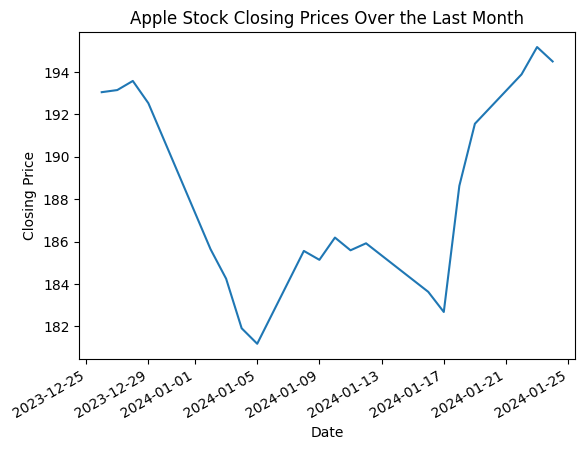

In [ ]:
# Plotting the closing prices of Apple stock
aapl_data = yf.download("AAPL", period="1mo")
aapl_data['Close'].plot(title="Apple Stock Closing Prices Over the Last Month")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

### We Can Also Calculate Moving Averages

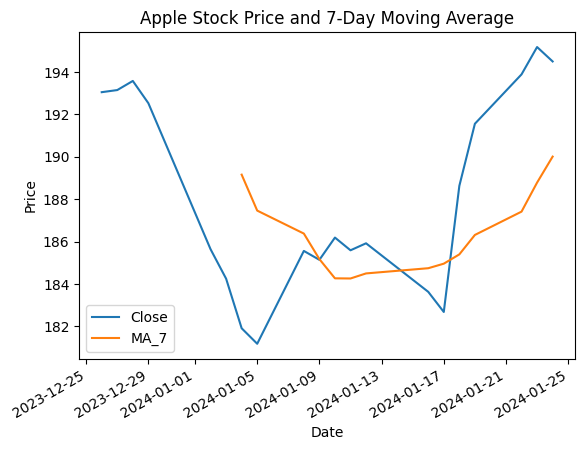

In [ ]:
# Calculate the 7-day moving average of the closing price
aapl_data['MA_7'] = aapl_data['Close'].rolling(window=7).mean()

# Plot both the closing price and the moving average
aapl_data[['Close', 'MA_7']].plot(title="Apple Stock Price and 7-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

## What about Pandas?

I'm always talking about Pandas in class - it's a great tool! Below, I'll use Pandas (`pd`) to display `yfinance` info in datatables, which will be a bit more readable.

In [ ]:
# First, Import
import pandas as pd

### Fetching Data for a Single Stock on the Most Recent Trading Day

In [ ]:
# Fetch recent stock data for a single stock, e.g., Apple Inc.
aapl_data = yf.Ticker("AAPL").history(period="1d")
pd.DataFrame(aapl_data)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-24 00:00:00-05:00,195.419998,196.380005,194.339996,194.5,53436628,0.0,0.0


### Fetching Data for Multiple Stocks on Multiple Days

In [ ]:
# Fetch data for multiple stocks over multiple days
stocks = ["AAPL", "MSFT", "GOOGL"]
# Here is where we start to see the advantage of Pandas
stock_data = yf.download(stocks, period="5d")
pd.DataFrame(stock_data['Close'])  # Display only the closing prices

[*********************100%%**********************]  3 of 3 completed


Ticker,AAPL,GOOGL,MSFT
Date,,,
2024-01-18,188.630005,143.479996,393.869995
2024-01-19,191.559998,146.380005,398.670013
2024-01-22,193.889999,145.990005,396.510010
2024-01-23,195.179993,147.039993,398.899994
2024-01-24,194.500000,148.699997,402.559998


### Top Companies by Market Cap

In [ ]:
# Fetch data for top companies by market cap
top_companies = ["AAPL", "MSFT", "AMZN", "GOOGL", "FB", "TSLA", "BRK-A", "TSM", "V", "JNJ"]
top_companies_data = yf.download(top_companies, period="1mo")
pd.DataFrame(top_companies_data['Close'])  # Displaying closing prices

[*********************100%%**********************]  10 of 10 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: Exception('%ticker%: No data found, symbol may be delisted')


Ticker,AAPL,AMZN,BRK-A,FB,GOOGL,JNJ,MSFT,TSLA,TSM,V
Date,,,,,,,,,,
2023-12-26,193.050003,153.410004,543635.0,NaN,141.520004,156.139999,374.660004,256.609985,104.449997,259.160004
2023-12-27,193.149994,153.339996,543750.0,NaN,140.369995,156.350006,374.070007,261.440002,104.650002,258.929993
2023-12-28,193.580002,153.380005,545000.0,NaN,140.229996,156.580002,375.279999,253.179993,104.699997,260.399994
2023-12-29,192.529999,151.940002,542625.0,NaN,139.690002,156.740005,376.040009,248.479996,104.000000,260.350006
2024-01-02,185.639999,149.929993,549787.0,NaN,138.169998,159.970001,370.869995,248.419998,101.529999,258.869995
2024-01-03,184.250000,148.470001,556050.0,NaN,138.919998,160.970001,370.600006,238.449997,100.169998,257.980011
2024-01-04,181.910004,144.570007,551550.0,NaN,136.389999,160.630005,367.940002,237.929993,99.129997,259.609985
2024-01-05,181.179993,145.240005,554300.0,NaN,135.729996,161.130005,367.750000,237.490005,99.610001,259.690002
2024-01-08,185.559998,149.100006,558780.0,NaN,138.839996,161.529999,374.690002,240.449997,102.239998,262.540009


### Here, a Big Fancy Graph

Matplotlib doesn't rely on Pandas, it will print the same as before. So, instead of repeating myself - here's a fancier version of my graph from before.

[*********************100%%**********************]  1 of 1 completed


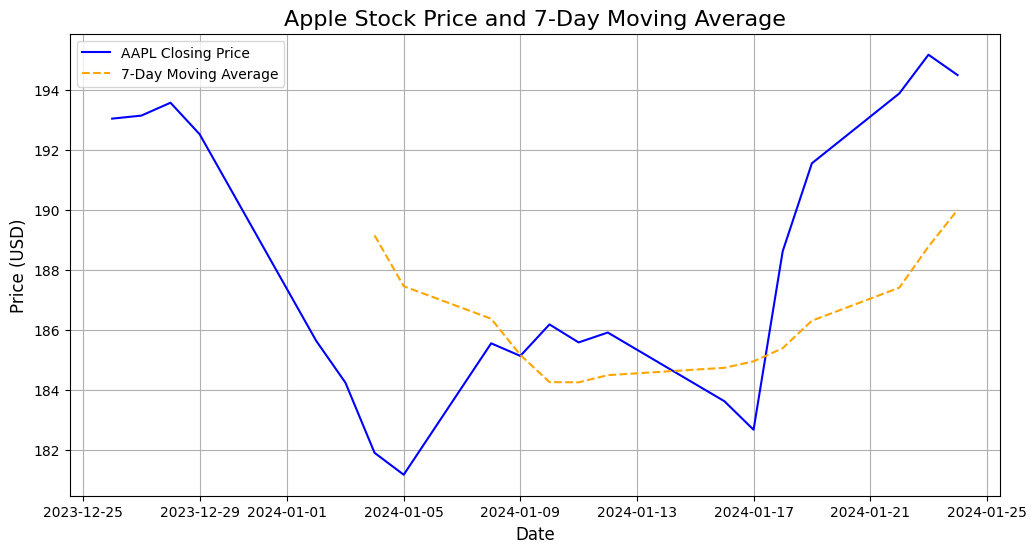

In [ ]:
# Ensure that data for Apple stock is available
aapl_data = yf.download("AAPL", period="1mo")

# Calculate the 7-day moving average of the closing price
aapl_data['MA_7'] = aapl_data['Close'].rolling(window=7).mean()

# Plotting settings
plt.figure(figsize=(12, 6))  # Setting the size of the plot
plt.plot(aapl_data['Close'], label='AAPL Closing Price', color='blue', linestyle='-')  # Closing price line
plt.plot(aapl_data['MA_7'], label='7-Day Moving Average', color='orange', linestyle='--')  # Moving average line

# Adding title and labels
plt.title('Apple Stock Price and 7-Day Moving Average', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)

# Adding grid, legend, and showing the plot
plt.grid(True)
plt.legend()
plt.show()